In [16]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# -----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (20,10) 
pd.options.display.max_columns = None

In [17]:
df= pd.read_pickle('datos/cars_price_norm_est_cod.pkl')
df.head(2)

,Levy,Prod_year,Mileage,Cylinders,Airbags,Price_log,Manufacturer_le,Category_le,Leather_interior_le,Fuel_type_le,Engine_volume_le,Gear_box_type_le,Drive_wheels_le,Doors_le,Color_le
0,1.766963,-0.411248,0.237134,1.375313,1.329406,9.497622,29,4,1,2,58,0,0,2,12
1,0.943936,-0.173337,0.273438,1.375313,0.319668,9.718422,8,4,0,5,52,2,0,2,1


In [18]:
df.shape

(9877, 15)

##### <font color=green> En el pair programming anterior creastéis vuestro primer modelo de machine learning usando la regresion Lineal. Es el momento, que con vuestros datos evaluéis si es bueno haciendo predicciones. Los objetivo de este pairprogramming son:
##### <font color=green> Calculéis las métricas para vuestro modelo



- Primero realizaremos la creación del modelo, igual que realizamos en el pair anterior

In [19]:
X = df.drop("Price_log", axis = 1)
y = df["Price_log"]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
# iniciamos la regresión lineal. n_jobs hace referencia al número de nucleos que usaremos de nuestro ordenador. Al indicar -1 significa que los usaremos todos. 

lr = LinearRegression(n_jobs=-1)

In [22]:
# fiteamos el modelo, lo que significa que le pasamos los datos de entrenamiento para que aprenda el algoritmo. Fijaros que para que aprenda, les paso solo los datos de entrenamiento

lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [23]:
# fiteamos el modelo, lo que significa que le pasamos los datos de entrenamiento para que aprenda el algoritmo. Fijaros que para que aprenda, les paso solo los datos de entrenamiento

lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [24]:
# es el momento de hacer las predicciones, para eso usarmos el método predict() de sklearn 

y_predict_train = lr.predict(x_train) # hacemos las predicciones para los coches que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) # hacemos las predicciones para los coches que tenemos en los datos de test

In [25]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
13506,7.619724,9.269343,Train
1284,9.404508,9.385289,Train
278,10.816934,9.763560,Train
12539,9.303466,9.551433,Train
7494,10.810738,9.918090,Train


In [26]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
13506,7.619724,9.269343,Train,-1.649618
1284,9.404508,9.385289,Train,0.019219
278,10.816934,9.763560,Train,1.053374
12539,9.303466,9.551433,Train,-0.247967
7494,10.810738,9.918090,Train,0.892648


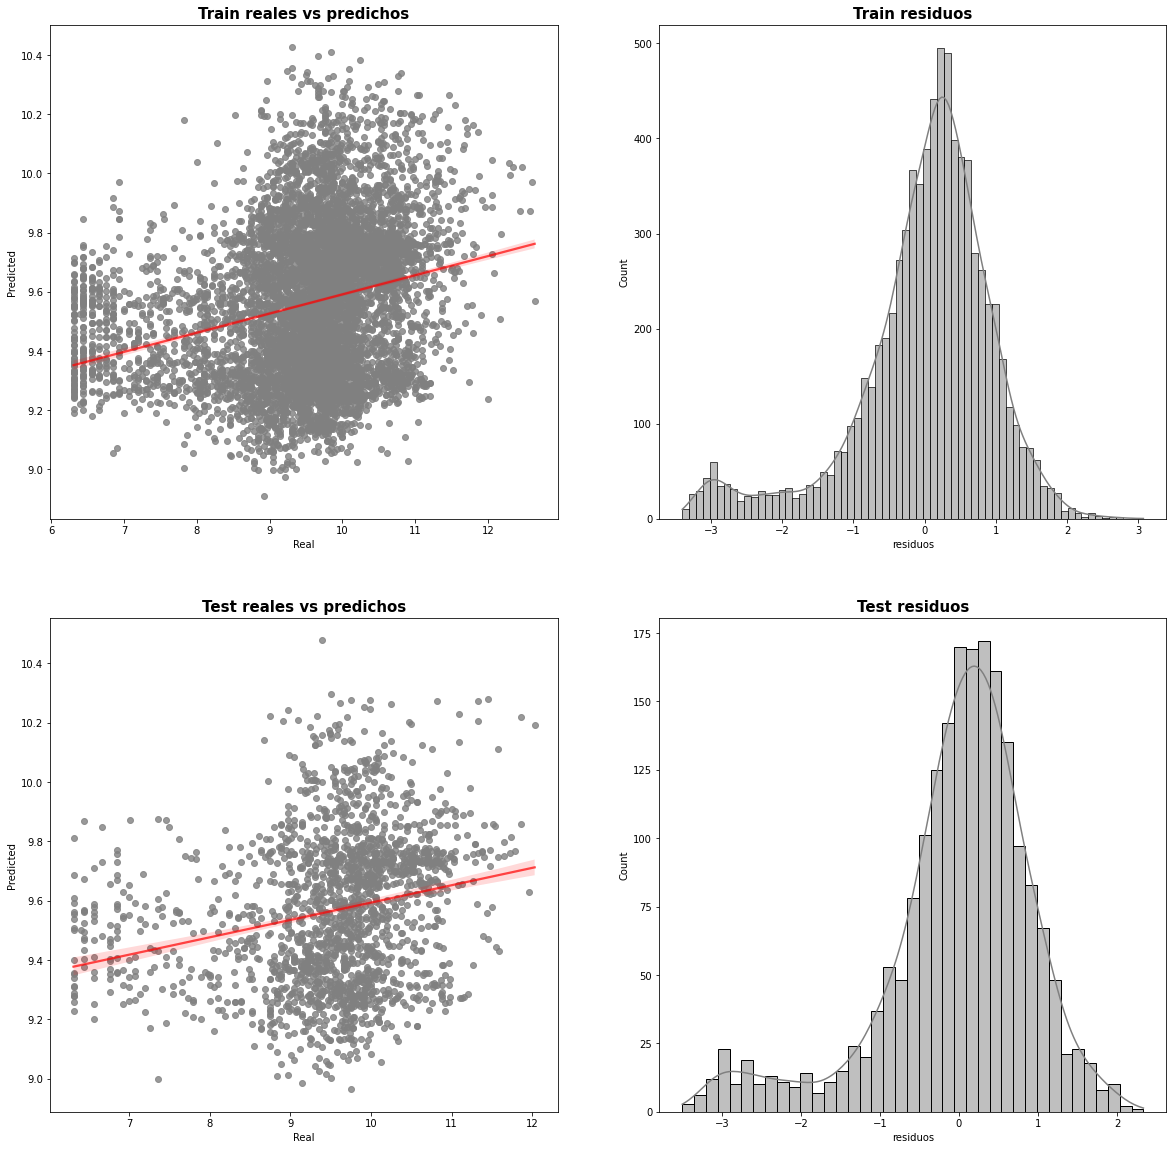

In [27]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

- Pasamos a realizar el cálculo de las métricas

In [28]:
# Para el conjunto de entrenamsiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.064778631252563
El MAE es 0.7002763440775458
El MSE es 0.9273196991811722
EL RMSE es  0.9629744021422232
Para el conjunto test:---------------
El valor de r2 score es  0.05017866674381488
El MAE es 0.6936456642592325
El MSE es 0.9308605752526119
EL RMSE es  0.9648111604104773


- Lo convertimos a dataframe para analizarlo mejor:

In [29]:
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.693646,0.930861,0.964811,0.050179,test,Linear Regresion
1,0.700276,0.927320,0.962974,0.064779,train,LinearRegression


##### <font color=green> Discutid los resultados de las métricas y extraed conclusiones

In [33]:
resultados

,Real,Predicted,Set,residuos
13506,7.619724,9.269343,Train,-1.649618
1284,9.404508,9.385289,Train,0.019219
278,10.816934,9.763560,Train,1.053374
12539,9.303466,9.551433,Train,-0.247967
7494,10.810738,9.918090,Train,0.892648
...,...,...,...,...
12837,10.484361,9.999035,Test,0.485327
6717,8.679822,9.303737,Test,-0.623915
8534,9.436998,9.318656,Test,0.118341
11366,10.258782,9.687624,Test,0.571158


In [34]:
# Interpretar los resultados de arriba "resultados"

- R²: en el train tenemos un valor de 0'064, nuestro modelo es capaz de explicar un 6% de la variación en el valor de los precios de los coches. Es decir, nuestras variables predictoras explican en un 6% de la variaciónde los precios de los coches. 
 <font color=red>Realmente es un valor muy bajo, habría que incluir otras variables predictoras a nuestro modelo, pero cuales? 
<font color=white>
- MAE, el MSE y RMSE: nuestros valores estan muy cerca del 1, lo que nos indica que nuestro modelo comete muchos errores en las predicciones, nuestro modelo `no es bueno`!!

- <font color=red> interpretamos en el texto siguiente que nuestros precios se equivica un 96% del precio?? <font color=white>Aquí merece una especial mención el `RMSE`, que si bien el resto de las métricas suelen ser ambiguas esta métrica si la podemos "traducir a humano". En nuestro caso tenemos un valor de RMSE en el *train*. ¿Qué significa esto? Significa que de media nuestro modelo se equivoca en 0.96 (dolares, euros, ...) en las predicciones. Pero recordad importante!!!! Habíamos escalados los datos y nuestros valores de los precios de las casas varían entre 0 - 1. 

##### <font color=green> Guardad los resultados de las métricas en un csv para usarlo más adelante.

En nuestro casso lo guardamos también a pikle para que no nos cambie el object

In [30]:
df_resultados.to_pickle("resultados_cars_LR.pkl")

In [32]:
df_resultados.to_csv("resultados_cars_LR.csv")